In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
df = pd.read_csv('4xmm_slim_dr14.csv')
# drop first column
df = df.iloc[:, 1:]
# drop last column
df = df.iloc[:, :-1]
df.columns = df.columns.str.strip()
# set first column as index
df.set_index(df.columns[0], inplace=True)
df

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,...,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.675981,8.038111,2.339110e-16,1.635321e-16,7.477733e-16,2.453910e-16,7.503544e-16,2.994437e-16,...,-0.523192,NaN,NaN,0,56086.742951,56087.588194,NaN,NaN,1,f
4XMM J000000.2+623123,0.001078,62.523116,2.167670,21.189760,4.822757e-17,7.869429e-17,8.126540e-18,1.083667e-16,1.471056e-15,3.214948e-16,...,-0.796511,NaN,NaN,0,54134.485278,54135.043600,NaN,NaN,1,f
4XMM J000000.3-250629,0.001297,-25.108317,2.453619,10.784710,1.653872e-16,2.115387e-16,1.422986e-15,4.341466e-16,5.314440e-16,3.418048e-16,...,-0.598660,NaN,NaN,0,51696.440880,51696.788090,NaN,NaN,1,f
4XMM J000000.3-601742,0.001366,-60.295115,2.244868,26.889570,6.988109e-16,3.162751e-16,1.330748e-15,3.893567e-16,1.541574e-15,4.584984e-16,...,-0.874466,NaN,NaN,0,58972.676377,58972.858889,NaN,NaN,1,f
4XMM J000000.5-552138,0.002201,-55.360745,2.174880,48.448450,8.864110e-16,2.371883e-16,1.695742e-15,3.329001e-16,1.293371e-15,3.622838e-16,...,-0.312634,NaN,NaN,0,56086.742951,56087.588194,NaN,NaN,1,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235959.3+444657,359.997358,44.782622,2.575906,8.058851,7.221400e-16,4.821687e-16,7.642884e-16,5.025621e-16,8.316064e-16,6.878565e-16,...,-0.523827,NaN,NaN,0,55578.776979,55579.143507,NaN,NaN,1,f
4XMM J235959.5+083623,359.998190,8.606417,1.461607,24.795520,5.054400e-16,2.644167e-16,1.435247e-15,4.256895e-16,1.953498e-15,5.815737e-16,...,-0.847527,NaN,NaN,0,56649.483437,56650.132060,NaN,NaN,1,f
4XMM J235959.7-551750,359.998804,-55.297271,2.000396,227.709300,3.998181e-15,7.241592e-16,8.984326e-15,1.075234e-15,5.528385e-15,9.985901e-16,...,-1.712891,0.033714,f,1,56086.742951,56087.588194,0.715455,0.279463,1,f


In [3]:
df = df[df['sc_sum_flag'] == 0]
df = df.drop(columns=['sc_sum_flag'])
len(df)

482597

In [4]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(f"Columns with NaN values: {columns_with_nan}")

Columns with NaN values: ['sc_hr1', 'sc_hr1_err', 'sc_hr2', 'sc_hr2_err', 'sc_hr3', 'sc_hr3_err', 'sc_hr4', 'sc_hr4_err', 'sc_ext_err', 'sc_chi2prob', 'sc_var_flag', 'sc_fvar', 'sc_fvarerr']


In [5]:
# count the number of NaN values in each column
nan_counts = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

Number of NaN values in each column:
sc_hr1           3895
sc_hr1_err       3895
sc_hr2           2273
sc_hr2_err       2273
sc_hr3           2365
sc_hr3_err       2365
sc_hr4           4984
sc_hr4_err       4984
sc_ext_err     467762
sc_chi2prob    384353
sc_var_flag    384353
sc_fvar        421526
sc_fvarerr     421526
dtype: int64


In [6]:
# remove rows with NaN values on the 'sc_hr1', 'sc_hr1_err', 'sc_hr2', 'sc_hr2_err', 'sc_hr3', 'sc_hr3_err', 'sc_hr4', 'sc_hr4_err',
df = df.dropna(subset=['sc_hr1', 'sc_hr1_err', 'sc_hr2', 'sc_hr2_err', 'sc_hr3', 'sc_hr3_err', 'sc_hr4', 'sc_hr4_err'])

In [7]:
df[['sc_chi2prob', 'sc_fvar', 'sc_fvarerr']].describe()

,sc_chi2prob,sc_fvar,sc_fvarerr
count,97545.000000,60723.000000,60723.000000
mean,0.357605,0.651938,0.977545
std,0.285441,28.150860,132.436573
min,0.000000,0.001511,0.000843
25%,0.106612,0.193987,0.152602
50%,0.296162,0.309291,0.227824
75%,0.570613,0.482647,0.355547
max,0.999988,5718.195801,32591.986328


In [8]:
# drop column 'sc_var_flag'
df = df.drop(columns=['sc_var_flag'])
# fill NaN values in 'sc_fvar' and 'sc_fvarerr' with 0
df['sc_fvar'].fillna(0.0, inplace=True)
df['sc_fvarerr'].fillna(0.0, inplace=True)
# fill NaN values in 'sc_chi2prob' with 1
df['sc_chi2prob'].fillna(1.0, inplace=True)

/tmp/ipykernel_12396/2806430989.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sc_fvar'].fillna(0.0, inplace=True)
/tmp/ipykernel_12396/2806430989.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [9]:
df['sc_ext_err'] = df['sc_ext_err'].fillna(0.0)

In [10]:
df.columns

Index(['sc_ra', 'sc_dec', 'sc_poserr', 'sc_det_ml', 'sc_ep_1_flux',
       'sc_ep_1_flux_err', 'sc_ep_2_flux', 'sc_ep_2_flux_err', 'sc_ep_3_flux',
       'sc_ep_3_flux_err', 'sc_ep_4_flux', 'sc_ep_4_flux_err', 'sc_ep_5_flux',
       'sc_ep_5_flux_err', 'sc_ep_8_flux', 'sc_ep_8_flux_err', 'sc_ep_9_flux',
       'sc_ep_9_flux_err', 'sc_ep_8_fmin', 'sc_ep_8_fmin_err', 'sc_ep_8_fmax',
       'sc_ep_8_fmax_err', 'sc_hr1', 'sc_hr1_err', 'sc_hr2', 'sc_hr2_err',
       'sc_hr3', 'sc_hr3_err', 'sc_hr4', 'sc_hr4_err', 'sc_extent',
       'sc_ext_err', 'sc_ext_ml', 'sc_chi2prob', 'mjd_first', 'mjd_last',
       'sc_fvar', 'sc_fvarerr', 'n_detections', 'confused'],
      dtype='object')

In [11]:
err_columns = [
    'sc_poserr',
    'sc_det_ml',
    'sc_ep_1_flux_err',
    'sc_ep_2_flux_err',
    'sc_ep_3_flux_err',
    'sc_ep_4_flux_err',
    'sc_ep_5_flux_err', 
    'sc_ep_8_flux_err',
    'sc_ep_9_flux_err', 
    'sc_ep_8_fmin_err',
    'sc_ep_8_fmax_err',
    'sc_hr1_err',
    'sc_hr2_err',
    'sc_hr3_err',
    'sc_hr4_err',
    'sc_ext_err',
    'sc_fvarerr',
]

In [12]:
len(df)

470820

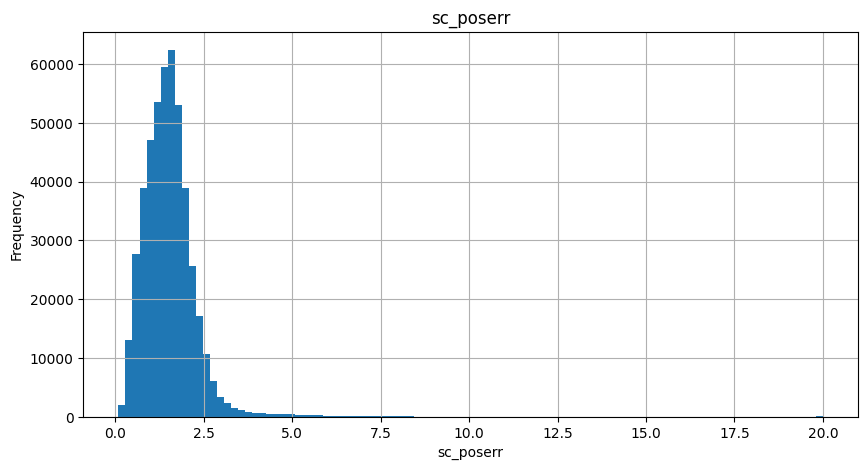

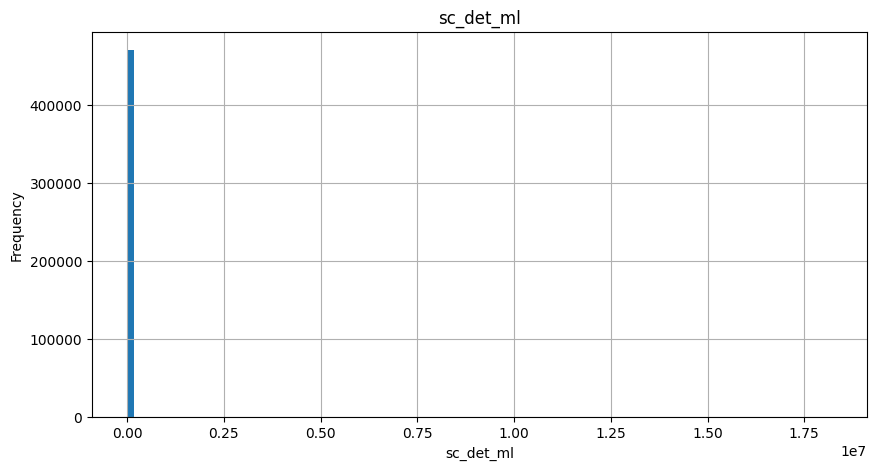

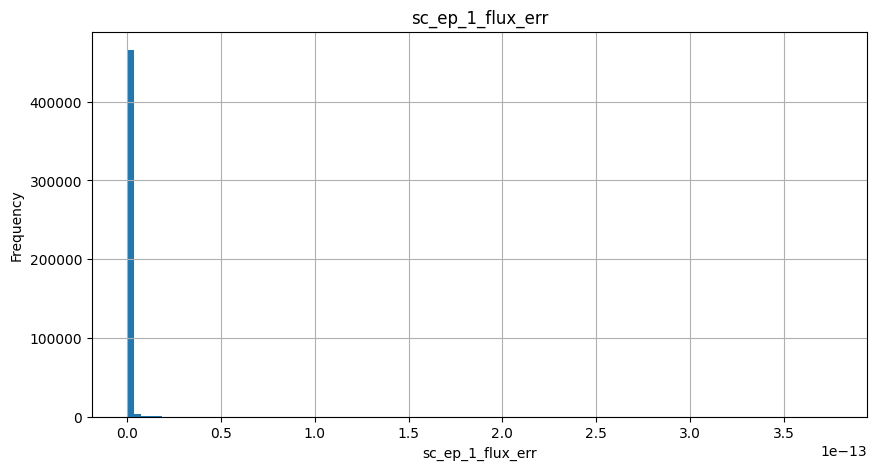

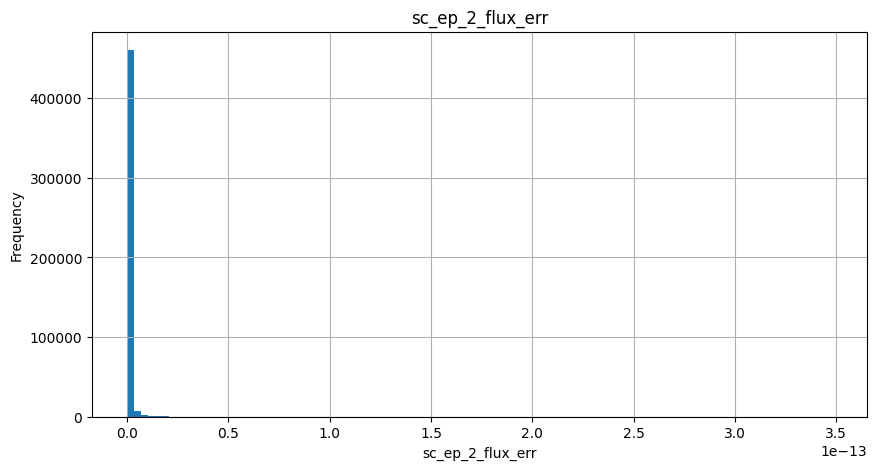

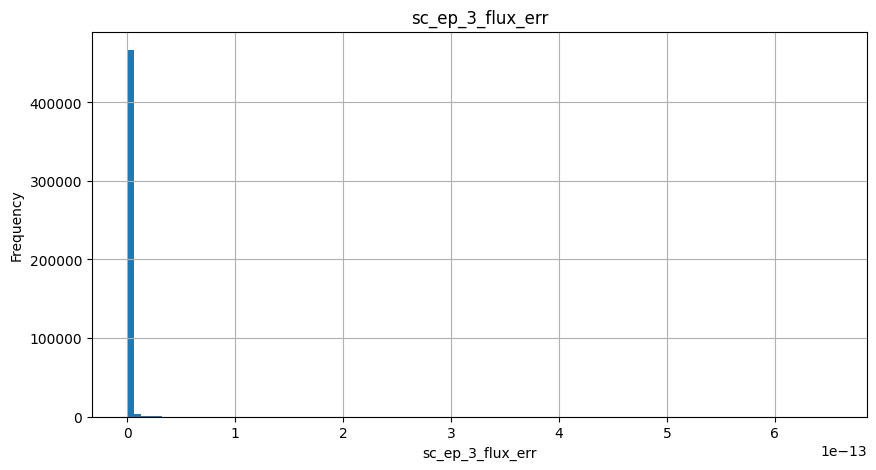

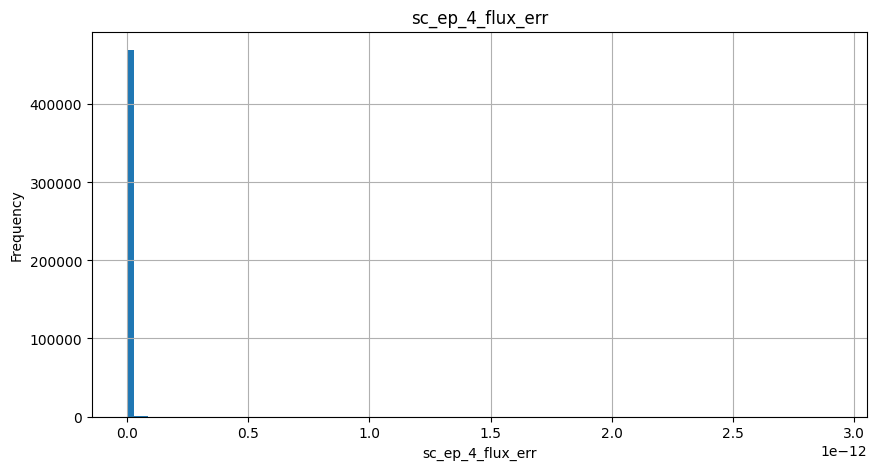

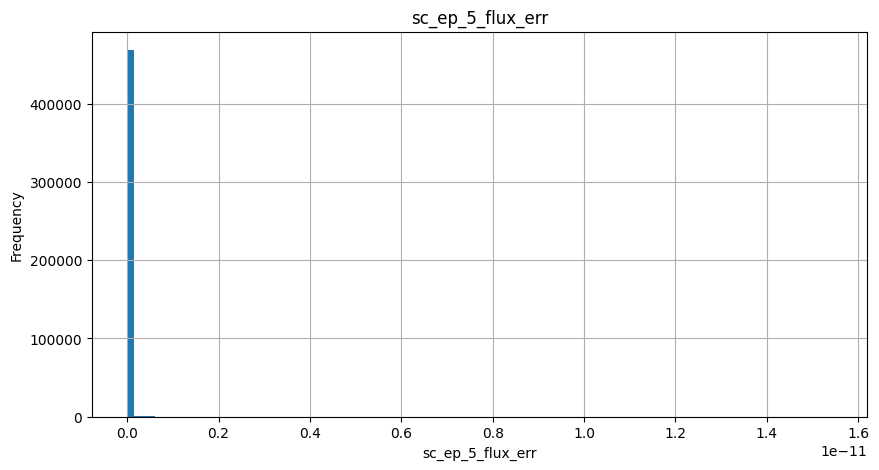

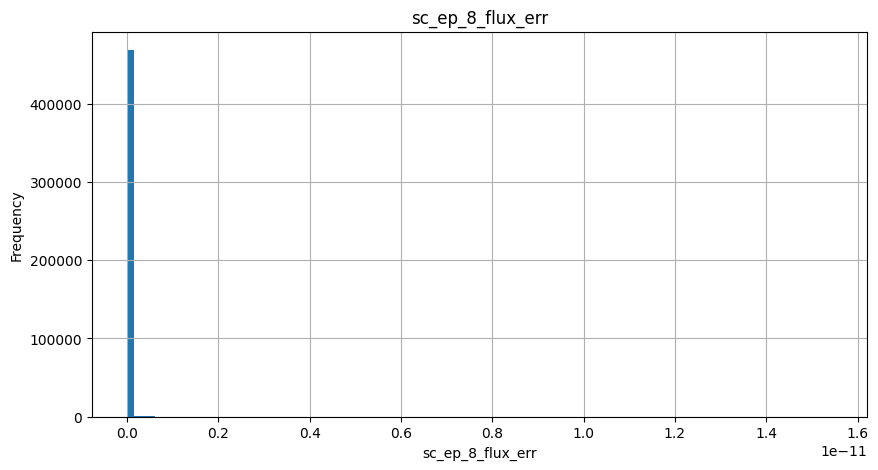

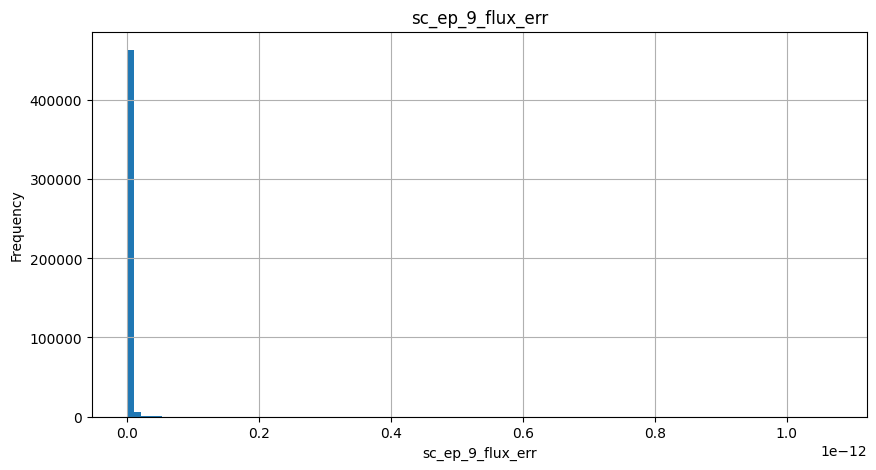

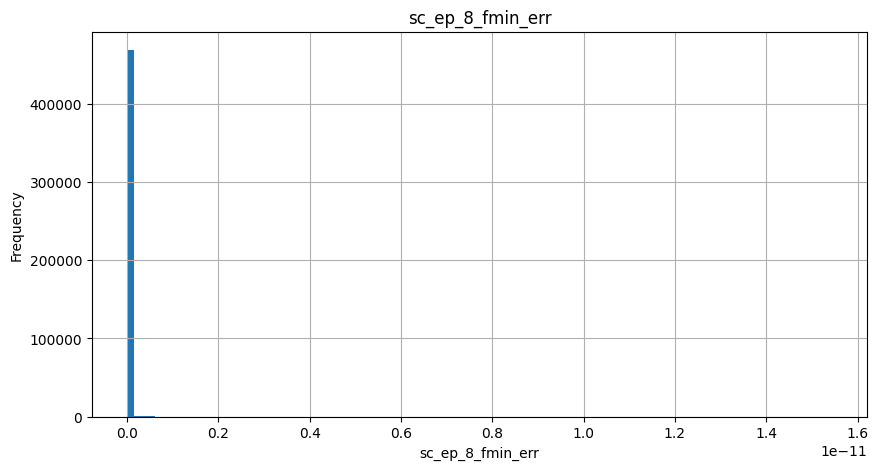

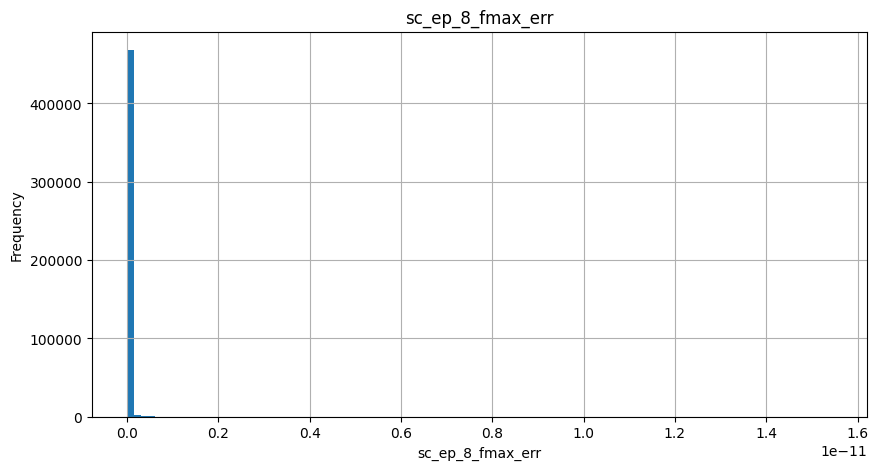

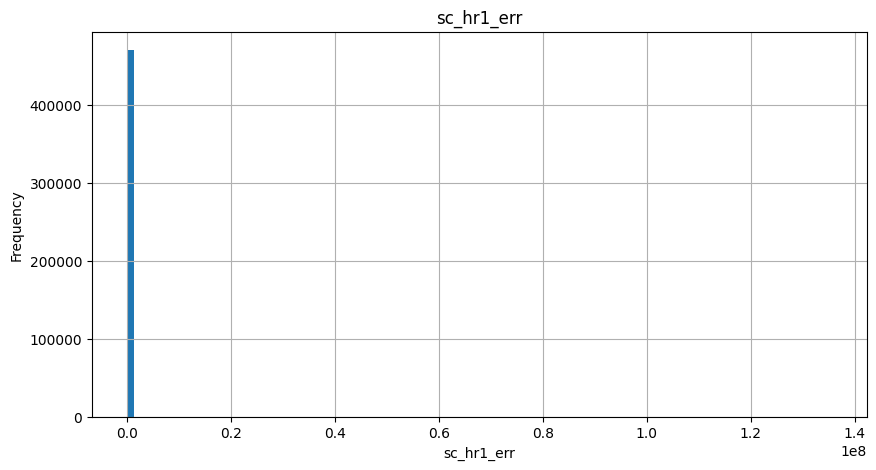

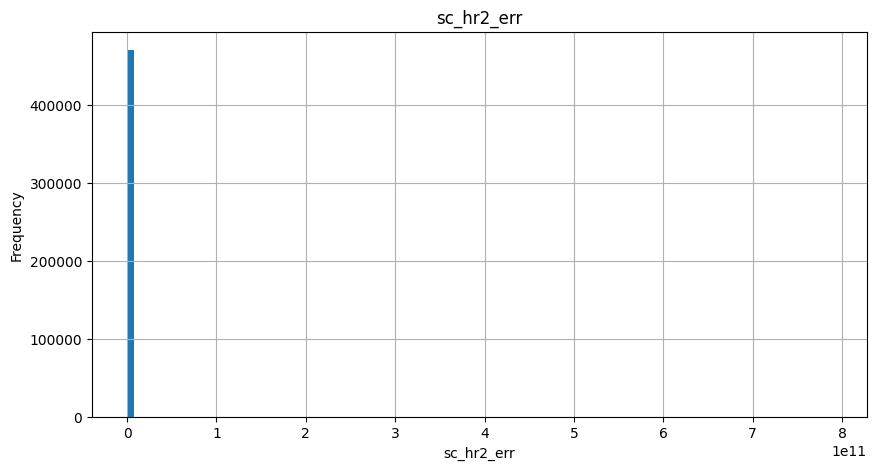

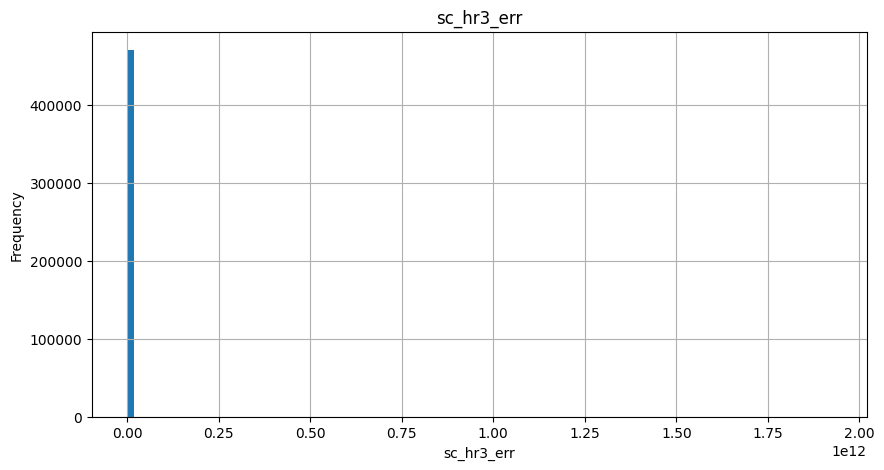

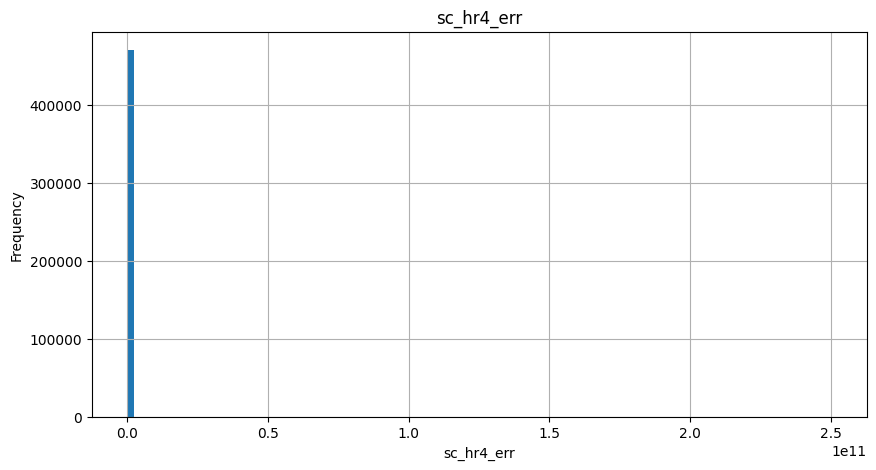

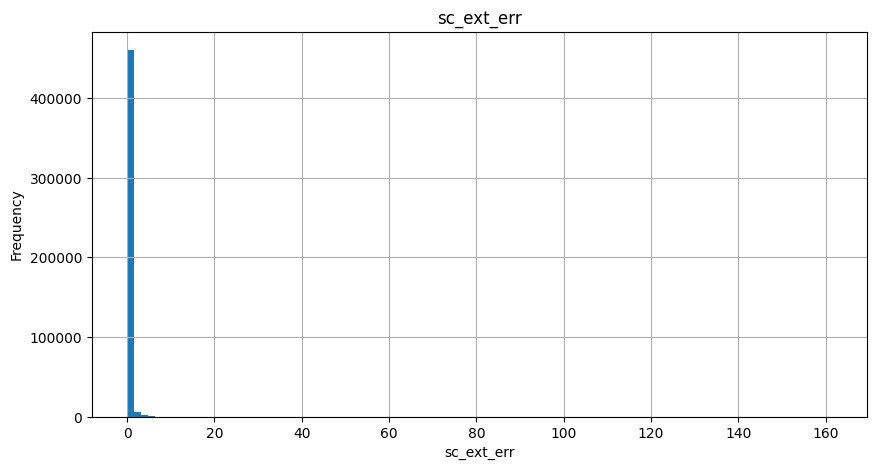

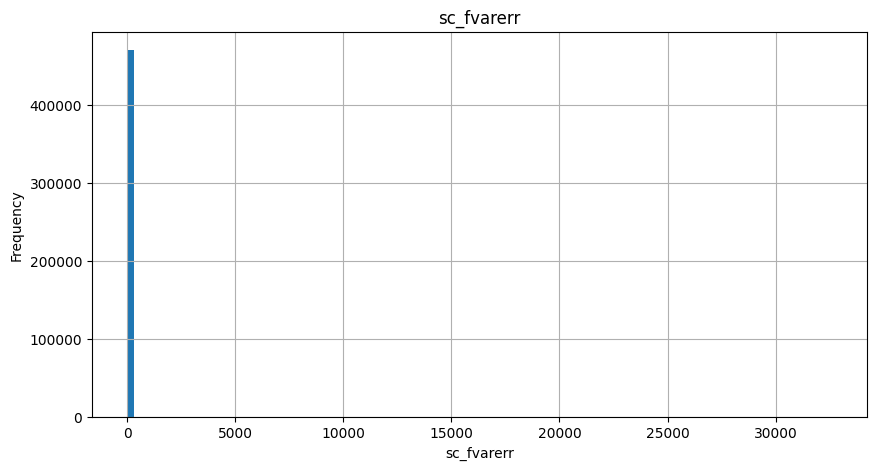

In [13]:
# for each err_columns, plot the distribution of the values
for col in err_columns:
    plt.figure(figsize=(10, 5))
    df[col].plot(kind='hist', bins=100, title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [14]:
# for each error column, remove outliers using the IQR method
for col in err_columns: #,['sc_poserr']'sc_ext_err'
    Q1 = df[col].quantile(0.0)
    Q3 = df[col].quantile(0.98)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [15]:
len(df)

448326

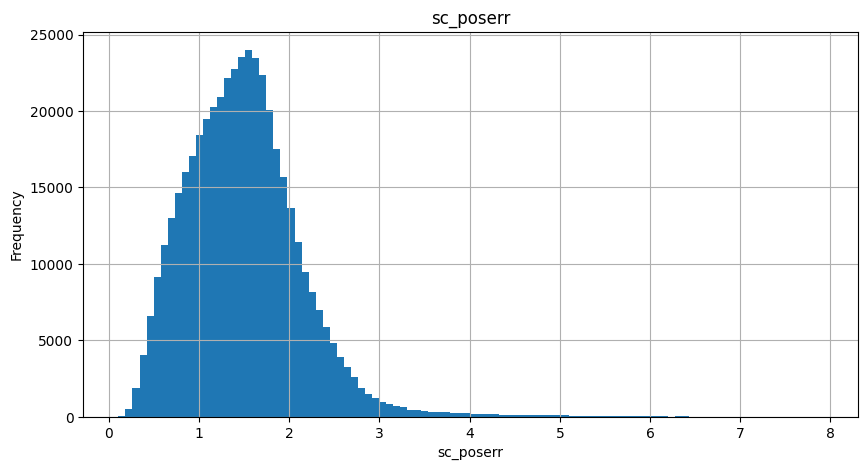

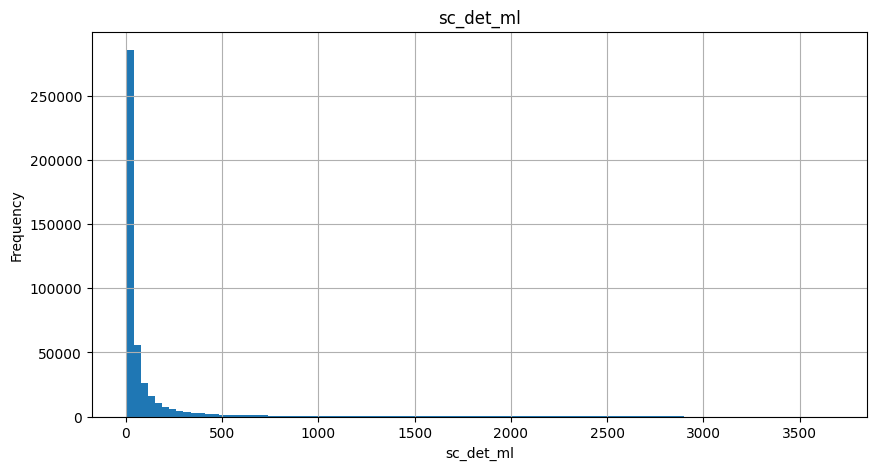

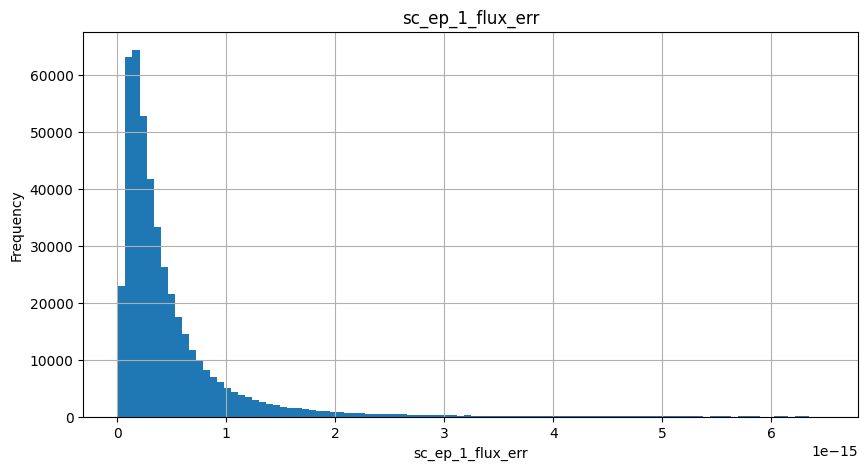

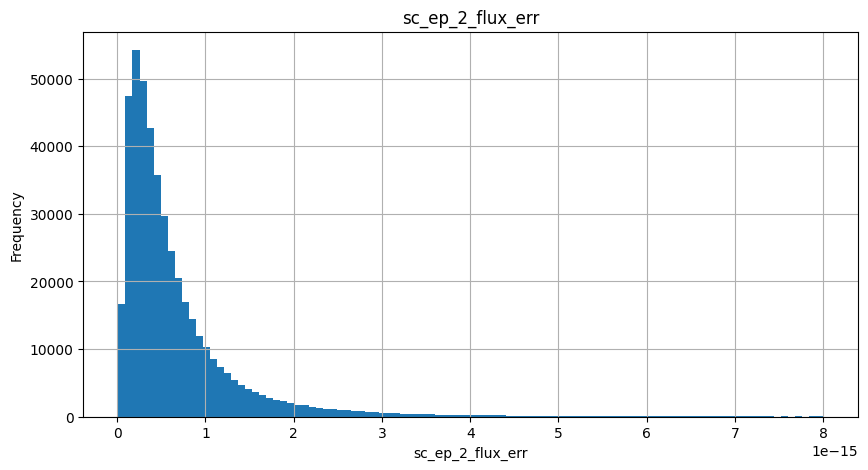

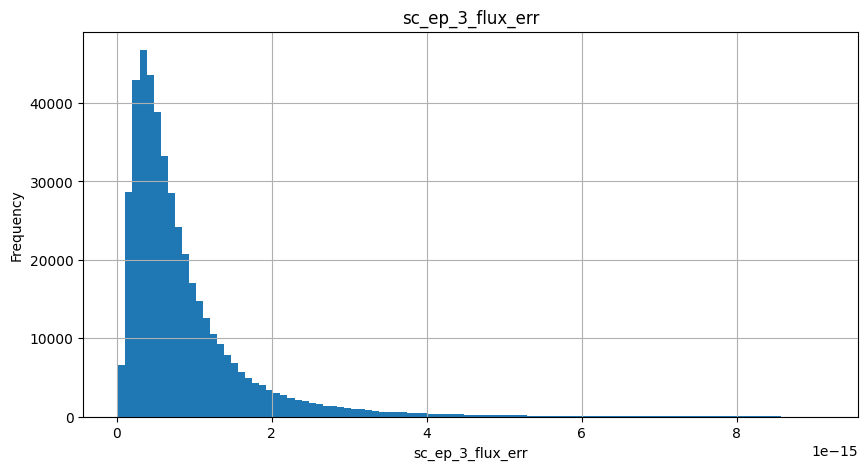

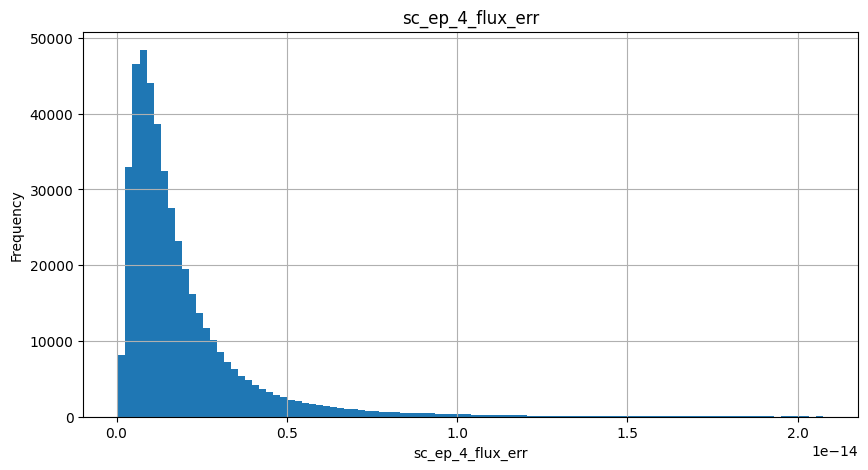

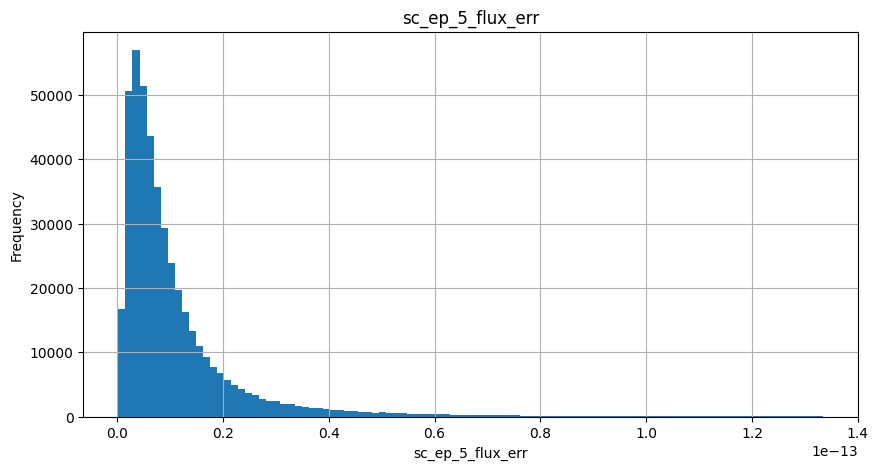

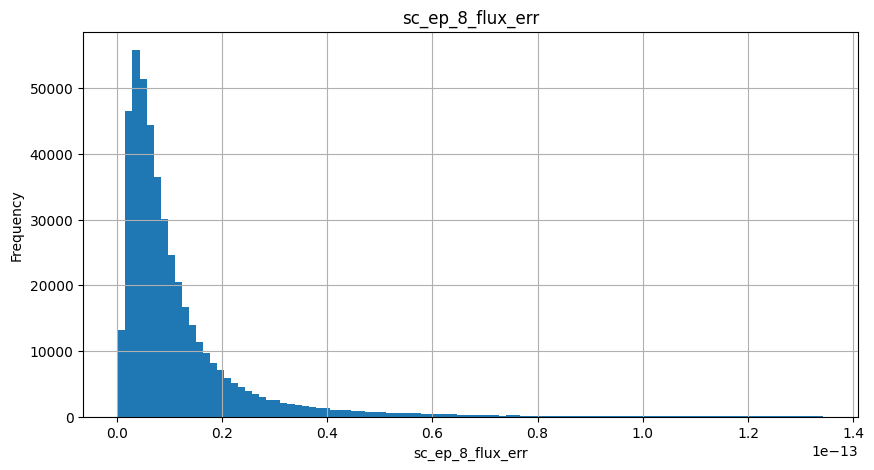

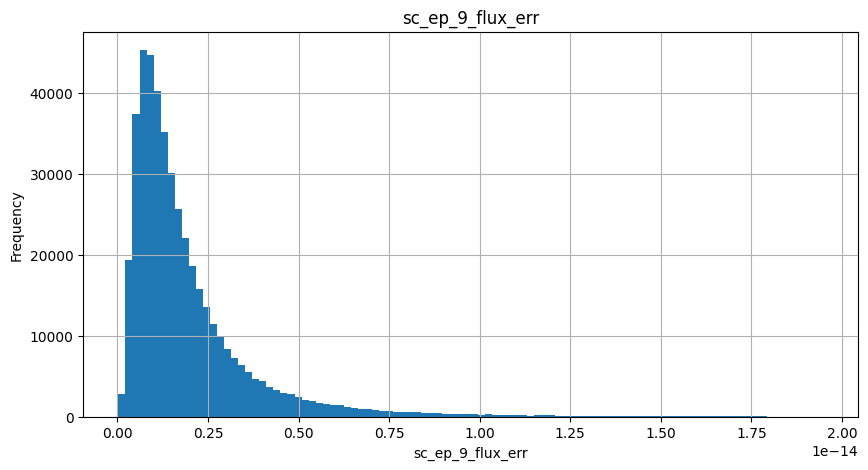

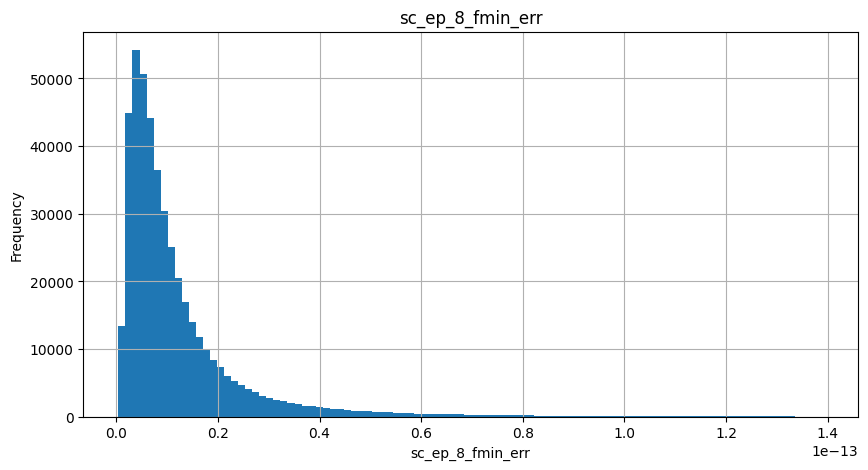

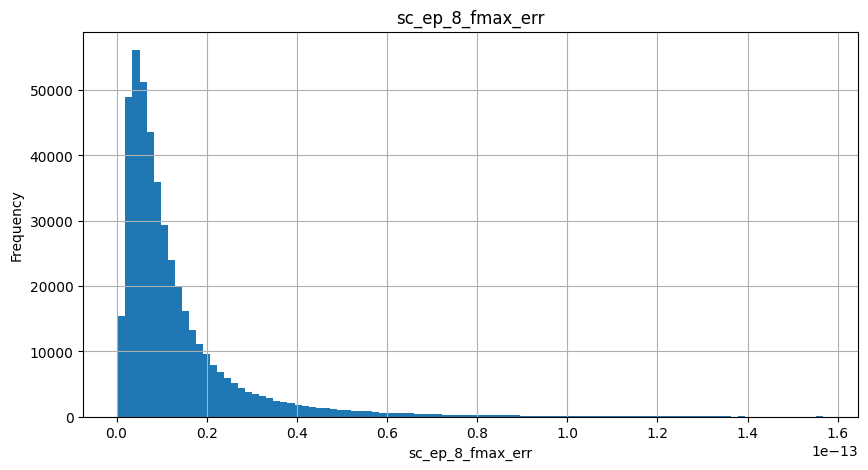

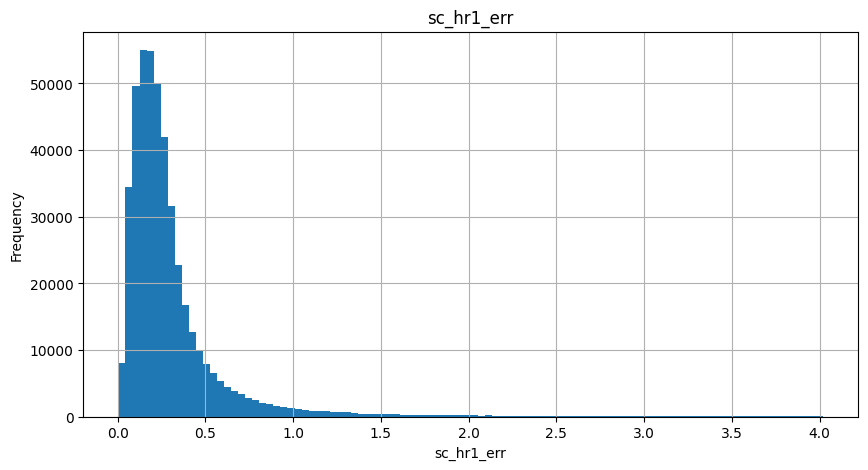

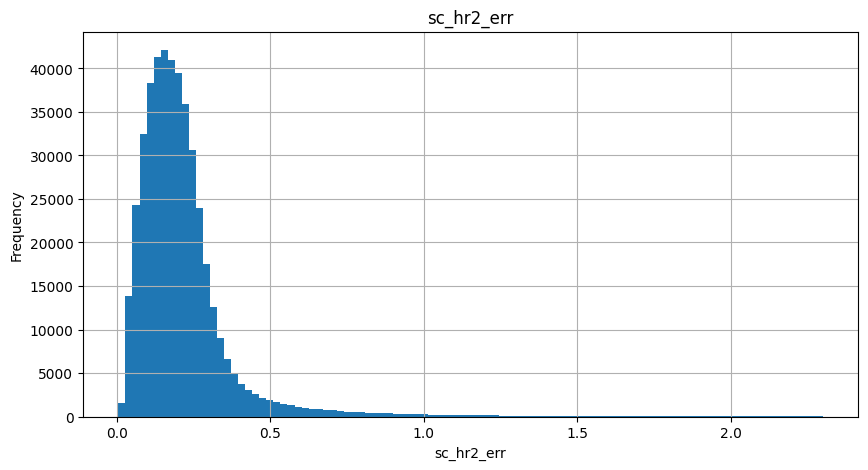

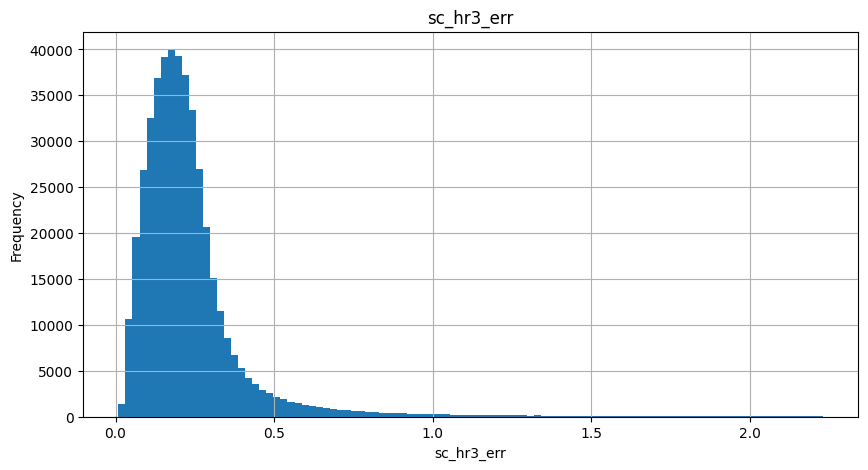

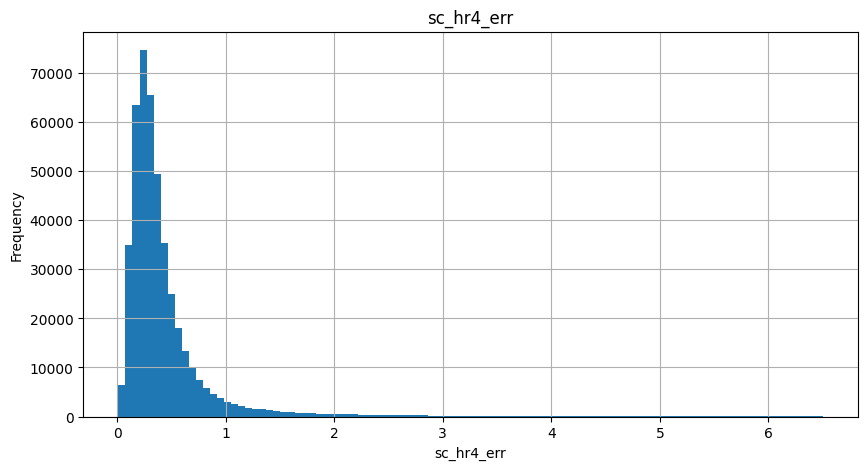

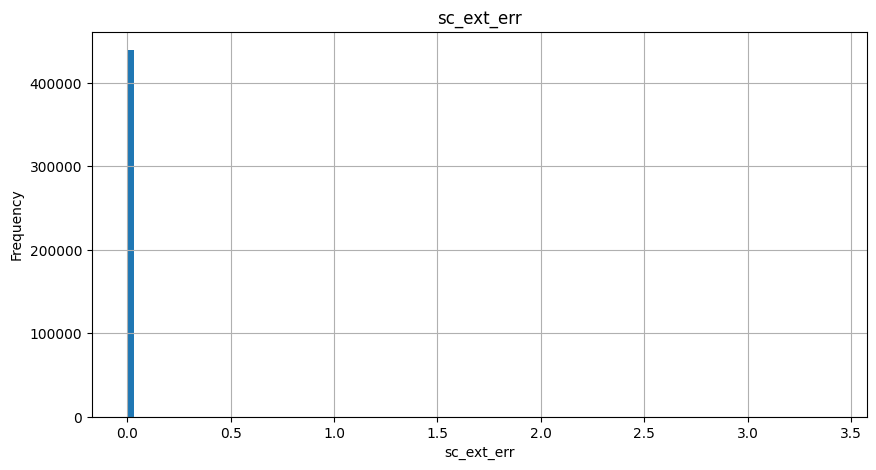

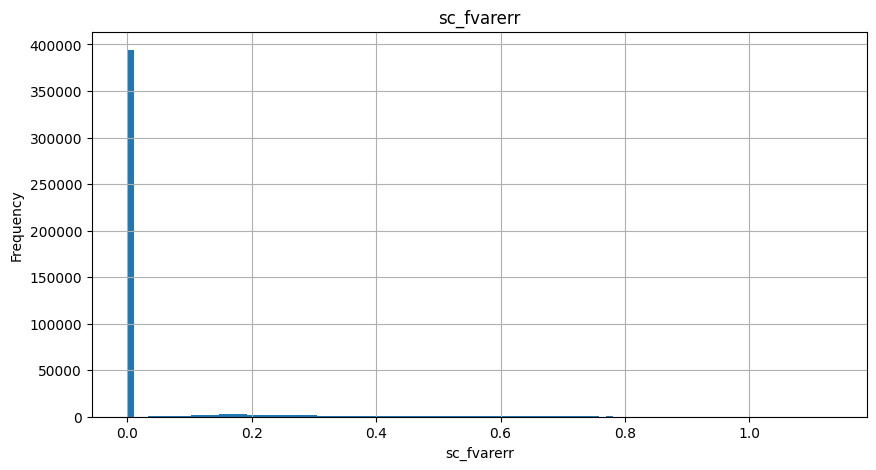

In [16]:
for col in err_columns:
    plt.figure(figsize=(10, 5))
    df[col].plot(kind='hist', bins=100, title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [17]:
df

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,...,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.675981,8.038111,2.339110e-16,1.635321e-16,7.477733e-16,2.453910e-16,7.503544e-16,2.994437e-16,...,0.0,0.0,-0.523192,1.0,56086.742951,56087.588194,0.0,0.0,1,f
4XMM J000000.2+623123,0.001078,62.523116,2.167670,21.189760,4.822757e-17,7.869429e-17,8.126540e-18,1.083667e-16,1.471056e-15,3.214948e-16,...,0.0,0.0,-0.796511,1.0,54134.485278,54135.043600,0.0,0.0,1,f
4XMM J000000.3-250629,0.001297,-25.108317,2.453619,10.784710,1.653872e-16,2.115387e-16,1.422986e-15,4.341466e-16,5.314440e-16,3.418048e-16,...,0.0,0.0,-0.598660,1.0,51696.440880,51696.788090,0.0,0.0,1,f
4XMM J000000.3-601742,0.001366,-60.295115,2.244868,26.889570,6.988109e-16,3.162751e-16,1.330748e-15,3.893567e-16,1.541574e-15,4.584984e-16,...,0.0,0.0,-0.874466,1.0,58972.676377,58972.858889,0.0,0.0,1,f
4XMM J000000.5-552138,0.002201,-55.360745,2.174880,48.448450,8.864110e-16,2.371883e-16,1.695742e-15,3.329001e-16,1.293371e-15,3.622838e-16,...,0.0,0.0,-0.312634,1.0,56086.742951,56087.588194,0.0,0.0,1,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,359.993255,68.268267,2.659222,9.475109,0.000000e+00,2.713281e-16,6.657592e-16,5.158331e-16,2.305227e-15,9.272168e-16,...,0.0,0.0,-0.651578,1.0,56291.882303,56292.258924,0.0,0.0,1,f
4XMM J235958.4+443342,359.993407,44.561783,2.258631,50.272730,9.024415e-16,4.692972e-16,3.593635e-15,8.039802e-16,3.326689e-15,8.575434e-16,...,0.0,0.0,-1.097485,1.0,55578.776979,55579.143507,0.0,0.0,1,f
4XMM J235958.8-251113,359.995216,-25.187033,2.244728,30.028570,4.037357e-16,3.499781e-16,4.317132e-16,4.057328e-16,3.785663e-15,8.757267e-16,...,0.0,0.0,-0.911902,1.0,51696.440880,51696.788090,0.0,0.0,1,f


In [18]:
df['confused'].value_counts()

confused
f    448325
t         1
Name: count, dtype: int64

In [19]:
# drop column "confused" as it has practically only one value
df = df.drop(columns=['confused'])
df.columns

Index(['sc_ra', 'sc_dec', 'sc_poserr', 'sc_det_ml', 'sc_ep_1_flux',
       'sc_ep_1_flux_err', 'sc_ep_2_flux', 'sc_ep_2_flux_err', 'sc_ep_3_flux',
       'sc_ep_3_flux_err', 'sc_ep_4_flux', 'sc_ep_4_flux_err', 'sc_ep_5_flux',
       'sc_ep_5_flux_err', 'sc_ep_8_flux', 'sc_ep_8_flux_err', 'sc_ep_9_flux',
       'sc_ep_9_flux_err', 'sc_ep_8_fmin', 'sc_ep_8_fmin_err', 'sc_ep_8_fmax',
       'sc_ep_8_fmax_err', 'sc_hr1', 'sc_hr1_err', 'sc_hr2', 'sc_hr2_err',
       'sc_hr3', 'sc_hr3_err', 'sc_hr4', 'sc_hr4_err', 'sc_extent',
       'sc_ext_err', 'sc_ext_ml', 'sc_chi2prob', 'mjd_first', 'mjd_last',
       'sc_fvar', 'sc_fvarerr', 'n_detections'],
      dtype='object')

In [20]:
# drop all the error columns
df = df.drop(columns=err_columns)
df.columns

Index(['sc_ra', 'sc_dec', 'sc_ep_1_flux', 'sc_ep_2_flux', 'sc_ep_3_flux',
       'sc_ep_4_flux', 'sc_ep_5_flux', 'sc_ep_8_flux', 'sc_ep_9_flux',
       'sc_ep_8_fmin', 'sc_ep_8_fmax', 'sc_hr1', 'sc_hr2', 'sc_hr3', 'sc_hr4',
       'sc_extent', 'sc_ext_ml', 'sc_chi2prob', 'mjd_first', 'mjd_last',
       'sc_fvar', 'n_detections'],
      dtype='object')

In [21]:
df['mjd_first'].describe()

count    448326.000000
mean      55745.765635
std        2391.074060
min       51577.464016
25%       53605.315822
50%       55864.076962
75%       57803.717535
max       60264.352199
Name: mjd_first, dtype: float64

In [22]:
df['datetime_first'] = df['mjd_first'].apply(lambda mjd: Time(mjd, format='mjd').to_datetime())
df['datetime_last'] = df['mjd_last'].apply(lambda mjd: Time(mjd, format='mjd').to_datetime())

In [23]:
df[['sc_ra', 'sc_dec']].describe()

,sc_ra,sc_dec
count,448326.000000,448326.000000
mean,174.302615,-3.218176
std,102.853175,38.171952
min,0.000981,-88.192989
25%,81.319126,-33.030353
50%,180.512789,-1.779050
75%,260.403657,27.711589
max,359.999520,89.403537


In [24]:
df

,sc_ra,sc_dec,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,...,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,mjd_first,mjd_last,sc_fvar,n_detections,datetime_first,datetime_last
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.339110e-16,7.477733e-16,7.503544e-16,3.047059e-16,4.004341e-15,6.556074e-15,2.705045e-15,6.556074e-15,...,0.556416,0.0,-0.523192,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51.000000,2012-06-09 14:07:00
4XMM J000000.2+623123,0.001078,62.523116,4.822757e-17,8.126540e-18,1.471056e-15,3.210278e-15,8.737898e-16,6.721141e-15,3.433501e-15,6.721141e-15,...,-0.848036,0.0,-0.796511,1.0,54134.485278,54135.043600,0.0,1,2007-02-03 11:38:48.000000,2007-02-04 01:02:47
4XMM J000000.3-250629,0.001297,-25.108317,1.653872e-16,1.422986e-15,5.314440e-16,8.581970e-16,7.553166e-16,6.078558e-15,4.116765e-15,6.078558e-15,...,-0.215945,0.0,-0.598660,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52.000000,2000-06-01 18:54:51
4XMM J000000.3-601742,0.001366,-60.295115,6.988109e-16,1.330748e-15,1.541574e-15,1.073534e-15,4.071881e-16,5.074447e-15,5.366679e-15,5.074447e-15,...,-0.684380,0.0,-0.874466,1.0,58972.676377,58972.858889,0.0,1,2020-05-03 16:13:59.000000,2020-05-03 20:36:48
4XMM J000000.5-552138,0.002201,-55.360745,8.864110e-16,1.695742e-15,1.293371e-15,2.222728e-15,1.120018e-14,1.819022e-14,5.588499e-15,1.819022e-14,...,0.301328,0.0,-0.312634,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51.000000,2012-06-09 14:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,359.993255,68.268267,0.000000e+00,6.657592e-16,2.305227e-15,7.177528e-15,1.509237e-14,2.561365e-14,7.376457e-15,2.561365e-14,...,-0.290683,0.0,-0.651578,1.0,56291.882303,56292.258924,0.0,1,2012-12-30 21:10:31.000000,2012-12-31 06:12:51
4XMM J235958.4+443342,359.993407,44.561783,9.024415e-16,3.593635e-15,3.326689e-15,1.949474e-15,1.983093e-14,3.464743e-14,1.216217e-14,3.464743e-14,...,0.472531,0.0,-1.097485,1.0,55578.776979,55579.143507,0.0,1,2011-01-17 18:38:51.000000,2011-01-18 03:26:39
4XMM J235958.8-251113,359.995216,-25.187033,4.037357e-16,4.317132e-16,3.785663e-15,3.934840e-15,2.086958e-14,2.974387e-14,8.826556e-15,2.974387e-14,...,0.304205,0.0,-0.911902,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52.000000,2000-06-01 18:54:51


In [25]:
# reduce the timestamps to 1 second precision
df['datetime_first'] = df['datetime_first'].dt.floor('S')
df['datetime_last'] = df['datetime_last'].dt.floor('S')

/tmp/ipykernel_12396/583294517.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['datetime_first'] = df['datetime_first'].dt.floor('S')
/tmp/ipykernel_12396/583294517.py:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['datetime_last'] = df['datetime_last'].dt.floor('S')


In [26]:
df

,sc_ra,sc_dec,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_ep_8_fmin,...,sc_hr4,sc_extent,sc_ext_ml,sc_chi2prob,mjd_first,mjd_last,sc_fvar,n_detections,datetime_first,datetime_last
iauname,,,,,,,,,,,,,,,,,,,,,
4XMM J000000.2-552106,0.000981,-55.351745,2.339110e-16,7.477733e-16,7.503544e-16,3.047059e-16,4.004341e-15,6.556074e-15,2.705045e-15,6.556074e-15,...,0.556416,0.0,-0.523192,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51,2012-06-09 14:07:00
4XMM J000000.2+623123,0.001078,62.523116,4.822757e-17,8.126540e-18,1.471056e-15,3.210278e-15,8.737898e-16,6.721141e-15,3.433501e-15,6.721141e-15,...,-0.848036,0.0,-0.796511,1.0,54134.485278,54135.043600,0.0,1,2007-02-03 11:38:48,2007-02-04 01:02:47
4XMM J000000.3-250629,0.001297,-25.108317,1.653872e-16,1.422986e-15,5.314440e-16,8.581970e-16,7.553166e-16,6.078558e-15,4.116765e-15,6.078558e-15,...,-0.215945,0.0,-0.598660,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52,2000-06-01 18:54:51
4XMM J000000.3-601742,0.001366,-60.295115,6.988109e-16,1.330748e-15,1.541574e-15,1.073534e-15,4.071881e-16,5.074447e-15,5.366679e-15,5.074447e-15,...,-0.684380,0.0,-0.874466,1.0,58972.676377,58972.858889,0.0,1,2020-05-03 16:13:59,2020-05-03 20:36:48
4XMM J000000.5-552138,0.002201,-55.360745,8.864110e-16,1.695742e-15,1.293371e-15,2.222728e-15,1.120018e-14,1.819022e-14,5.588499e-15,1.819022e-14,...,0.301328,0.0,-0.312634,1.0,56086.742951,56087.588194,0.0,1,2012-06-08 17:49:51,2012-06-09 14:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4XMM J235958.3+681605,359.993255,68.268267,0.000000e+00,6.657592e-16,2.305227e-15,7.177528e-15,1.509237e-14,2.561365e-14,7.376457e-15,2.561365e-14,...,-0.290683,0.0,-0.651578,1.0,56291.882303,56292.258924,0.0,1,2012-12-30 21:10:31,2012-12-31 06:12:51
4XMM J235958.4+443342,359.993407,44.561783,9.024415e-16,3.593635e-15,3.326689e-15,1.949474e-15,1.983093e-14,3.464743e-14,1.216217e-14,3.464743e-14,...,0.472531,0.0,-1.097485,1.0,55578.776979,55579.143507,0.0,1,2011-01-17 18:38:51,2011-01-18 03:26:39
4XMM J235958.8-251113,359.995216,-25.187033,4.037357e-16,4.317132e-16,3.785663e-15,3.934840e-15,2.086958e-14,2.974387e-14,8.826556e-15,2.974387e-14,...,0.304205,0.0,-0.911902,1.0,51696.440880,51696.788090,0.0,1,2000-06-01 10:34:52,2000-06-01 18:54:51


In [27]:
df.to_csv('4xmm_slim_dr14_preprocessed.csv')